In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore") 

In [3]:
SCMD = pd.read_csv("C:\TestDirectory\Dissertation\SupplyChainDataset.csv",encoding='latin1')

In [4]:
# Checking the array dimension length 
SCMD.shape 

(180519, 53)

In [5]:
# Checking the count and number of variables 
SCMD.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [6]:
# Checking the first 20 rows of the dataset 
SCMD.head(20)

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0      DEBIT                         3                              4   
1   TRANSFER                         5                              4   
2       CASH                         4                              4   
3      DEBIT                         3                              4   
4    PAYMENT                         2                              4   
5   TRANSFER                         6                              4   
6      DEBIT                         2                              1   
7   TRANSFER                         2                              1   
8       CASH                         3                              2   
9       CASH                         2                              1   
10  TRANSFER                         6                              2   
11  TRANSFER                         5                              2   
12  TRANSFER                         4                              2   
13     DEBIT                         2                              1   
14  TRANSFER                         2                              1   
15     DEBIT                         2                              1   
16   PAYMENT                         5                              2   
17      CASH                         2                              1   
18     DEBIT                         2                              1   
19   PAYMENT                         0                              0   

    Benefit per order  Sales per customer    Delivery Status  \
0           91.250000          314.640015   Advance shipping   
1         -249.089996          311.359985      Late delivery   
2         -247.779999          309.720001   Shipping on time   
3           22.860001          304.809998   Advance shipping   
4          134.210007          298.250000   Advance shipping   
5           18.580000          294.980011  Shipping canceled   
6           95.180000          288.420013      Late delivery   
7           68.430000          285.140015      Late delivery   
8          133.720001          278.589996      Late delivery   
9          132.149994          275.309998      Late delivery   
10         130.580002          272.029999  Shipping canceled   
11          45.689999          268.760010      Late delivery   
12          21.760000          262.200012      Late delivery   
13          24.580000          245.809998      Late delivery   
14          16.389999          327.750000      Late delivery   
15        -259.579987          324.470001      Late delivery   
16        -246.360001          321.200012      Late delivery   
17          23.840000          317.920013      Late delivery   
18         102.260002          314.640015      Late delivery   
19          87.180000          311.359985   Shipping on time   

    Late_delivery_risk  Category Id   Category Name   Customer City  ...  \
0                    0           73  Sporting Goods          Caguas  ...   
1                    1           73  Sporting Goods          Caguas  ...   
2                    0           73  Sporting Goods        San Jose  ...   
3                    0           73  Sporting Goods     Los Angeles  ...   
4                    0           73  Sporting Goods          Caguas  ...   
5                    0           73  Sporting Goods       Tonawanda  ...   
6                    1           73  Sporting Goods          Caguas  ...   
7                    1           73  Sporting Goods           Miami  ...   
8                    1           73  Sporting Goods          Caguas  ...   
9                    1           73  Sporting Goods       San Ramon  ...   
10                   0           73  Sporting Goods          Caguas  ...   
11                   1           73  Sporting Goods        Freeport  ...   
12                   1           73  Sporting Goods         Salinas  ...   
13                   1           73  Sporting Goods          Cagu

In [7]:
# Checking the column structure type 
SCMD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [8]:
# The statistical description of the dataset 
SCMD.describe()

Days for shipping (real)  Days for shipment (scheduled)  \
count             180519.000000                  180519.000000   
mean                   3.497654                       2.931847   
std                    1.623722                       1.374449   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count      180519.000000       180519.000000       180519.000000   
mean           21.974989          183.107609            0.548291   
std           104.433526          120.043670            0.497664   
min         -4274.979980            7.490000            0.000000   
25%             7.000000          104.379997            0.000000   
50%            31.520000          163.990005            1.000000   
75%            64.800003          247.399994            1.000000   
max           911.799988         1939.989990            1.000000   

         Category Id    Customer Id  Customer Zipcode  Department Id  \
count  180519.000000  180519.000000     180516.000000  180519.000000   
mean       31.851451    6691.379495      35921.126914       5.443460   
std        15.640064    4162.918106      37542.461122       1.629246   
min         2.000000       1.000000        603.000000       2.000000   
25%        18.000000    3258.500000        725.000000       4.000000   
50%        29.000000    6457.000000      19380.000000       5.000000   
75%        45.000000    9779.000000      78207.000000       7.000000   
max        76.000000   20757.000000      99205.000000      12.000000   

            Latitude  ...  Order Item Quantity          Sales  \
count  180519.000000  ...        180519.000000  180519.000000   
mean       29.719955  ...             2.127638     203.772096   
std         9.813646  ...             1.453451     132.273077   
min       -33.937553  ...             1.000000       9.990000   
25%        18.265432  ...             1.000000     119.980003   
50%        33.144863  ...             1.000000     199.919998   
75%        39.279617  ...             3.000000     299.950012   
max        48.781933  ...             5.000000    1999.989990   

       Order Item Total  Order Profit Per Order  Order Zipcode  \
count     180519.000000           180519.000000   24840.000000   
mean         183.107609               21.974989   55426.132327   
std          120.043670              104.433526   31919.279101   
min            7.490000            -4274.979980    1040.000000   
25%          104.379997                7.000000   23464.000000   
50%          163.990005               31.520000   59405.000000   
75%          247.399994               64.800003   90008.000000   
max         1939.989990              911.799988   99301.000000   

       Product Card Id  Product Category Id  Product Description  \
count    180519.000000        180519.000000                  0.0   
mean        692.509764            31.851451                  NaN   
std         336.446807            15.640064                  NaN   
min          19.000000             2.000000                  NaN   
25%         403.000000            18.000000                  NaN   
50%         627.000000            29.000000                  NaN   
75%        1004.000000            45.000000                  NaN   
max        1363.000000            76.000000                  NaN   

       Product Price  Product Status  
count  180519.000000        180519.0  
mean      141.232550             0.0  
std       139.732492             0.0  
min         9.990000             0.0  
25%        50.000000             0.0  
50%        59.990002             0.0  
75%       199.990005             0.0  
max      1999.989990             0.0  

[8 r

In [9]:
# Checking the missing values 
np.sum(SCMD.isna())

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [10]:
# Filling the missing values 
SCMD['Customer Zipcode']=SCMD['Customer Zipcode'].fillna(0)
SCMD['Order Zipcode']=SCMD['Order Zipcode'].fillna(0)
SCMD['Customer Fname']=SCMD['Customer Fname'].fillna("NotSpecified")
SCMD['Customer Full Name'] = SCMD['Customer Fname'].astype(str)+SCMD['Customer Lname'].astype(str)

In [11]:
# Deleting the unnecessary columns and checking the array dimension length 
ColumnDrop = ['Customer Password','Product Status','Customer Email','Customer Street','Customer Fname', 'Customer Lname','Product Description','Product Image','Customer Zipcode','Order Zipcode']
SCMDData = SCMD.drop(ColumnDrop,axis=1)
SCMDData.shape

(180519, 44)

In [12]:
# Checking the column names 
SCMDData.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Name',
       'Product Price', 'shipping date (DateOrders)', 'Shipping Mode',
       'Customer Full Name'],
      dtype='object')

In [13]:
SCMDData.columns = [col.lower().replace(' ', '_') for col in SCMDData.columns]
SCMDData.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)
SCMDData.columns 

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_id', 'customer_segment', 'customer_state',
       'department_id', 'department_name', 'latitude', 'longitude', 'market',
       'order_city', 'order_country', 'order_customer_id',
       'order_date_dateorders', 'order_id', 'order_item_cardprod_id',
       'order_item_discount', 'order_item_discount_rate', 'order_item_id',
       'order_item_product_price', 'order_item_profit_ratio',
       'order_item_quantity', 'sales', 'order_item_total',
       'order_profit_per_order', 'order_region', 'order_state', 'order_status',
       'product_card_id', 'product_category_id', 'product_name',
       'product_price', 'shipping_date_dateorders', 'shipping_mode',
       'customer_full_name'],
      dtype='object')

C:\Users\anuvi\AppData\Local\Temp\ipykernel_14532\990217383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationmap = SCMDData.corr()


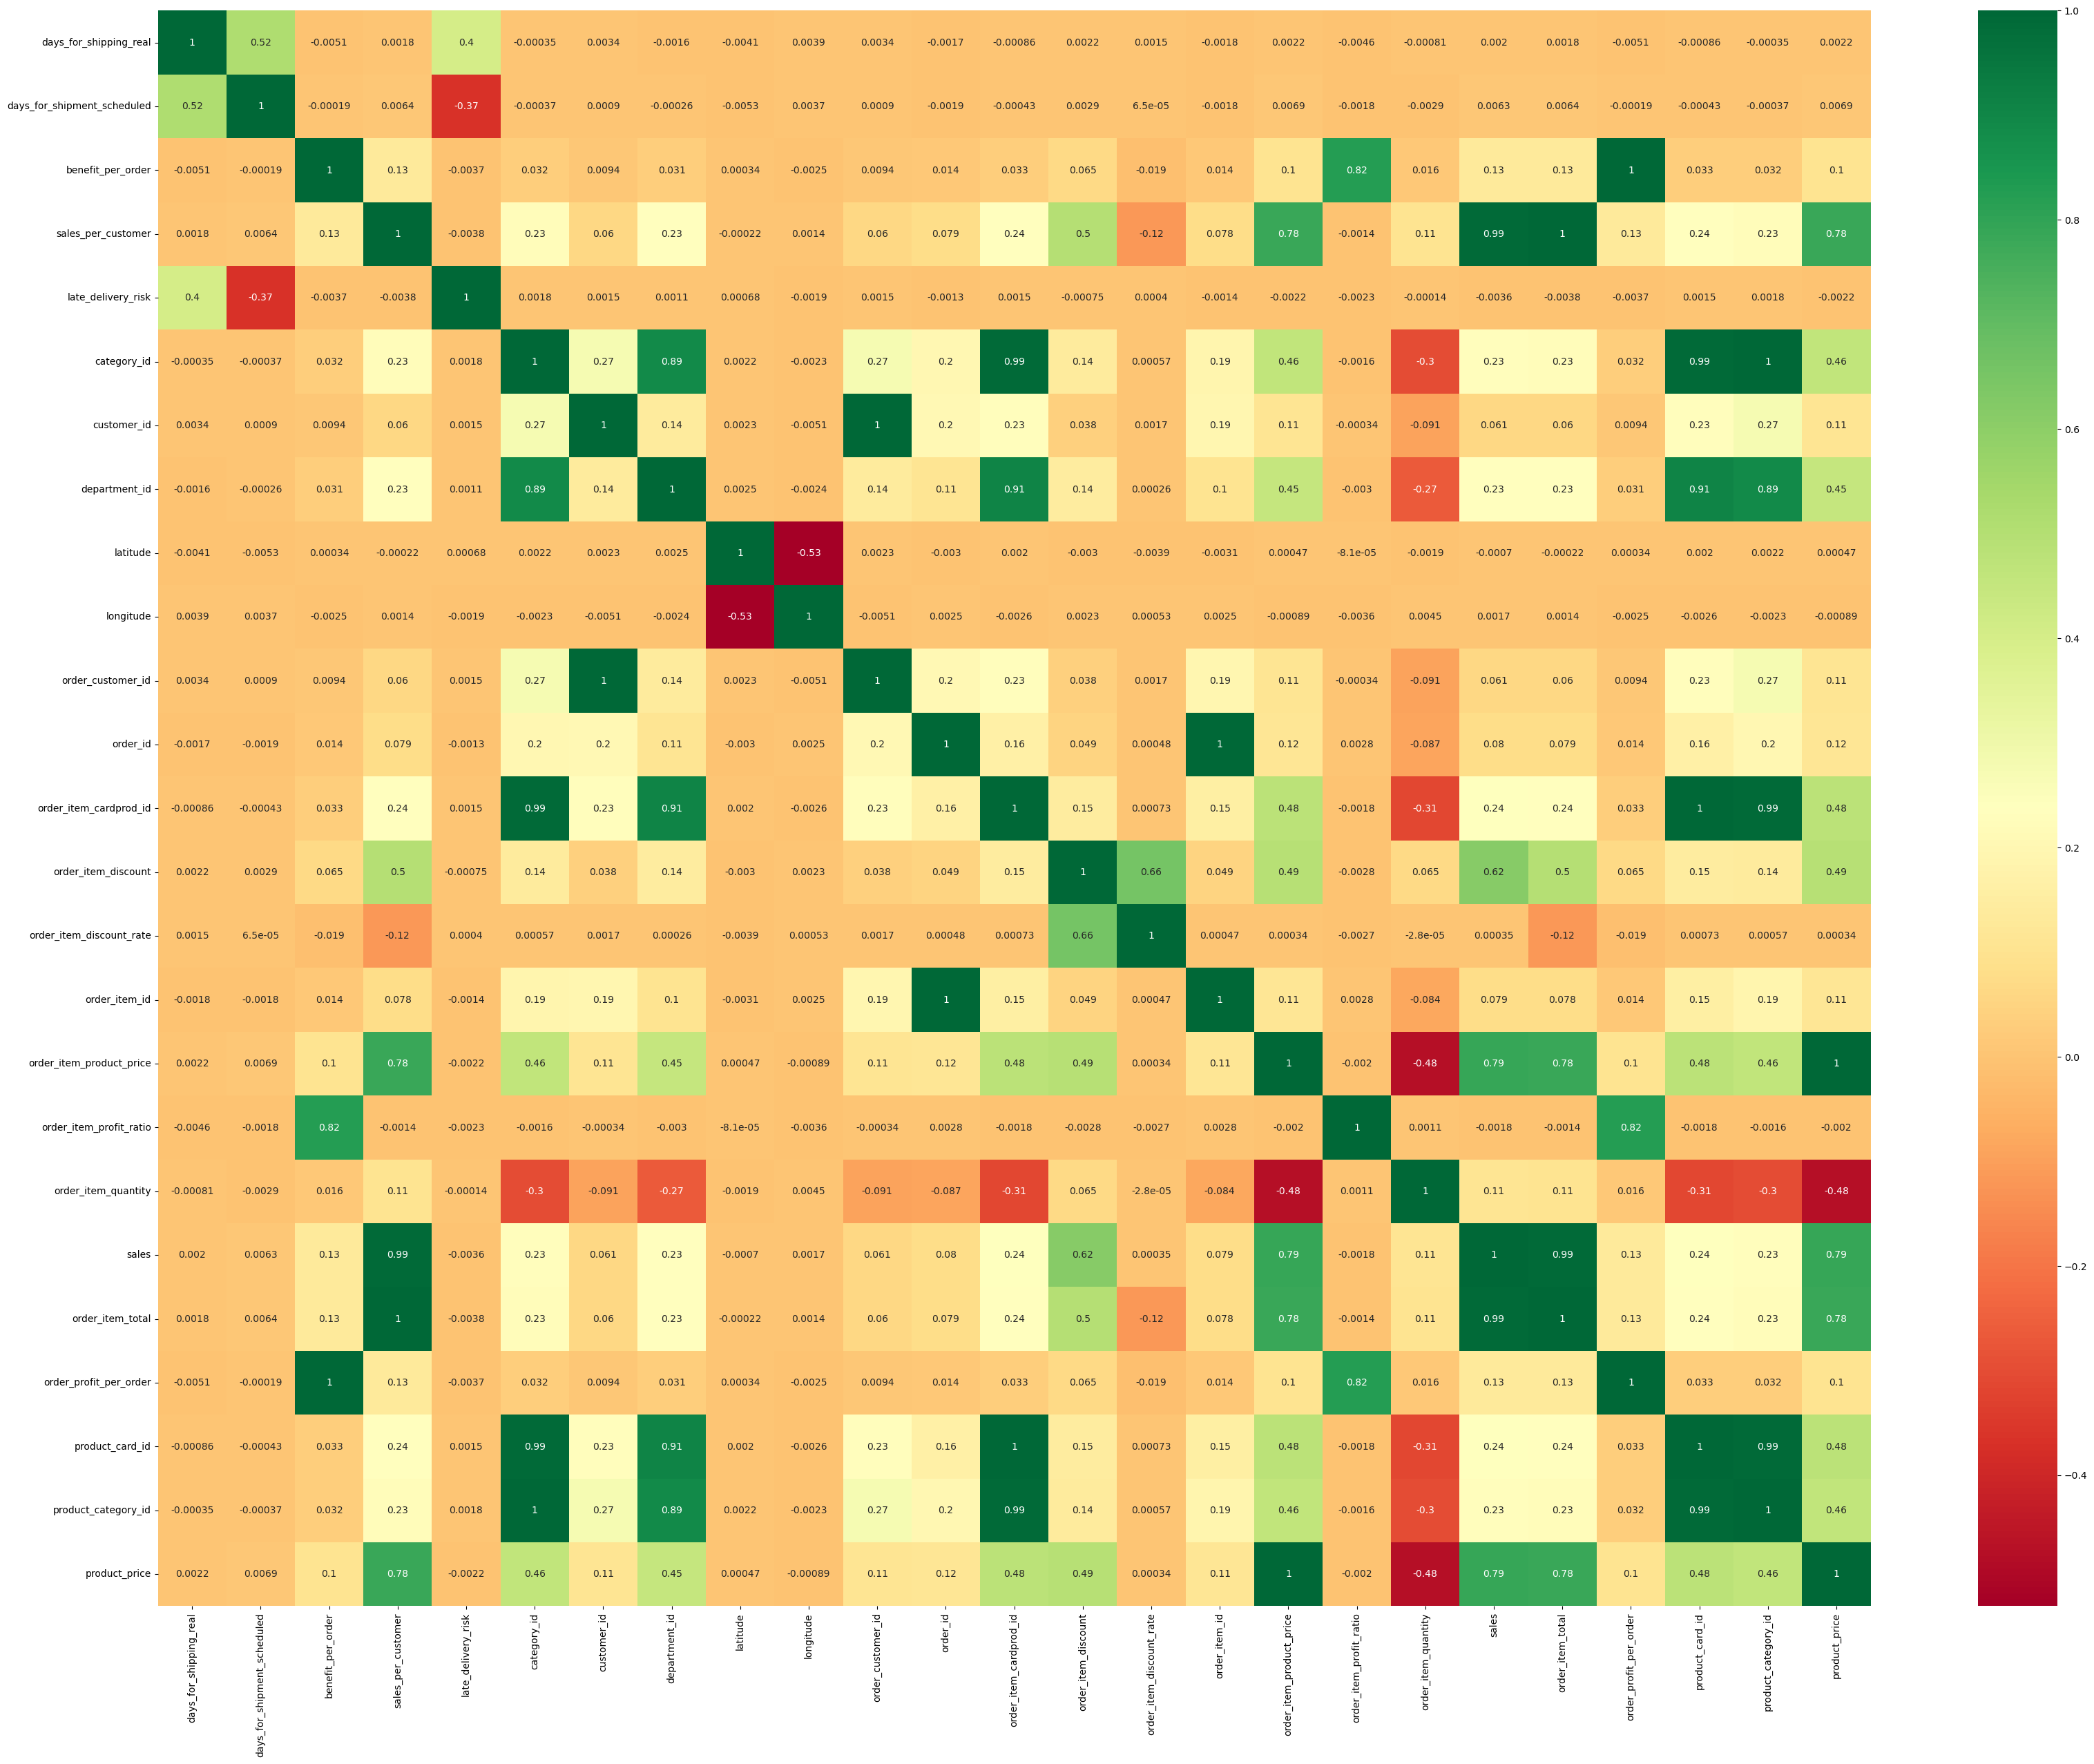

In [14]:
correlationmap = SCMDData.corr()
top=correlationmap.index
plt.figure(figsize=(40,30))
g=sns.heatmap(SCMDData[top].corr(),annot=True,cmap="RdYlGn")

C:\Users\anuvi\AppData\Local\Temp\ipykernel_14532\1454916104.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g = sns.heatmap(Features_SCMDData.corr(), annot = True, fmt = '.2f', cmap = "RdYlGn")


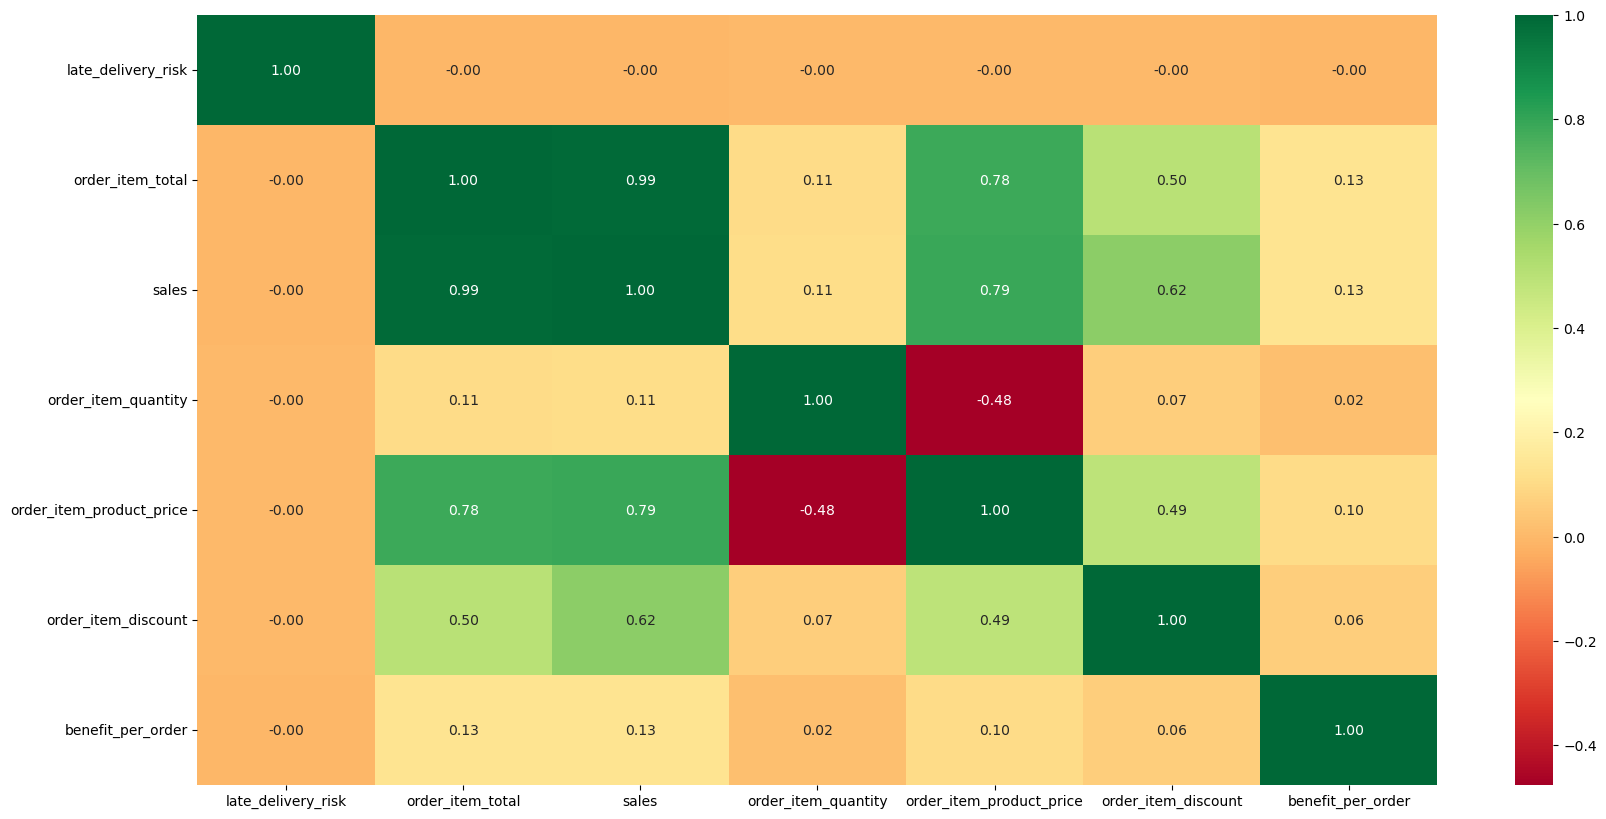

In [15]:
Features_SCMDData = SCMDData[['late_delivery_risk','order_item_total','sales','order_item_quantity','order_item_product_price','order_item_discount','order_date_dateorders','shipping_date_dateorders','benefit_per_order']]
plt.figure(figsize=(20,10))
g = sns.heatmap(Features_SCMDData.corr(), annot = True, fmt = '.2f', cmap = "RdYlGn")

In [16]:
# Grouping the data for getting totals 
Delivery_Data_Group=SCMDData.groupby('delivery_status')
Market_Data_Group = SCMDData.groupby('market') 
Region_Data_Group = SCMDData.groupby('order_region')
Customer_Data_Group=SCMDData.groupby('customer_segment')
Category_Data_Group=SCMDData.groupby('category_name')
Shipping_Data_Group=SCMDData.groupby('shipping_mode')
Region_Data_Group=SCMDData.groupby('order_region')

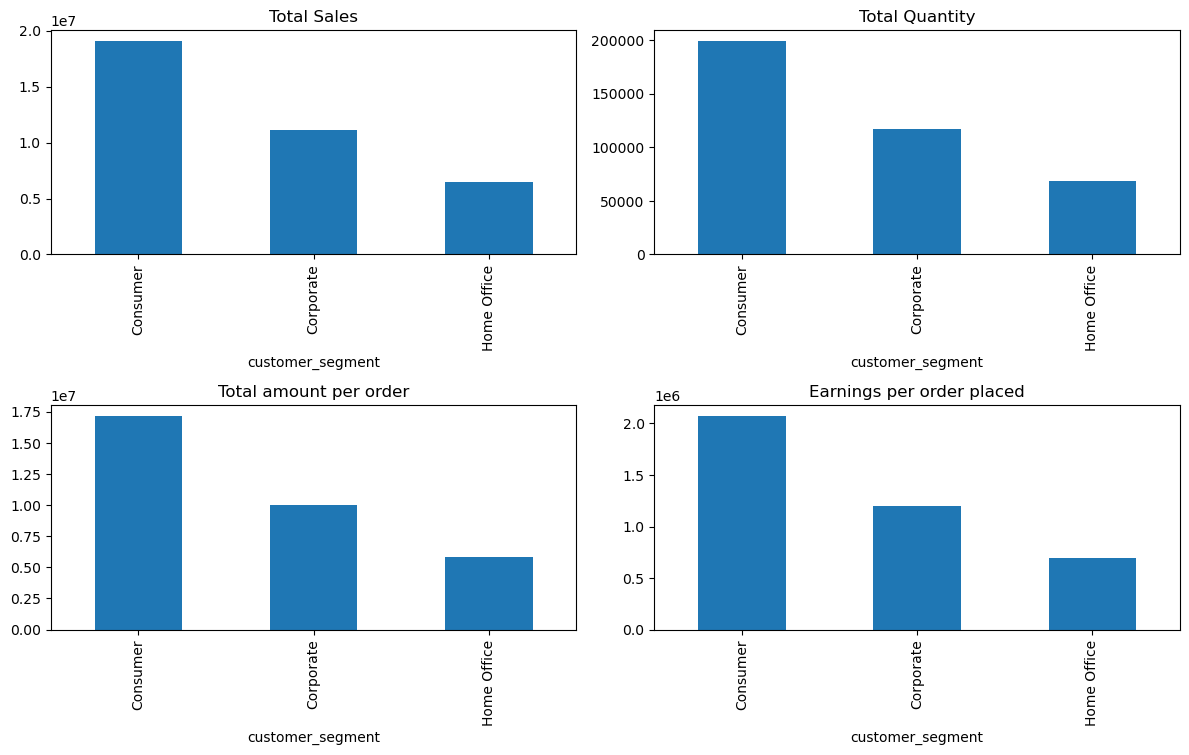

In [17]:
# Total sales by customer segment 
plt.figure(figsize=(8,8))
plt.subplot(4, 2, 1)
Customer_Data_Group['sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Sales")

# Total order item quantity by customer segment 
plt.subplot(4, 2, 2)
Customer_Data_Group['order_item_quantity'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Quantity")

# Total order item total by customer segment 
plt.subplot(4, 2, 3)
Customer_Data_Group['order_item_total'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total amount per order")

# Total earnings per order total by customer segment
plt.subplot(4, 2, 4)
Customer_Data_Group['benefit_per_order'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Earnings per order placed")


plt.tight_layout()
plt.show()


In [18]:
# Number of orders per customer segments 
Customer_Segment_Data=SCMDData.groupby(['customer_segment'])['order_id'].count().reset_index(name='order_item_quantity').sort_values(by= 'order_item_quantity', ascending= False)
px.pie(Customer_Segment_Data, values='order_item_quantity', names= 'customer_segment' , title= 'Number of Orders per Customer Segments', 
       color='customer_segment',
             color_discrete_map={'Consumer':'blue',
                                 'Corporate':'green',
                                 'Home Office':'yellow'})

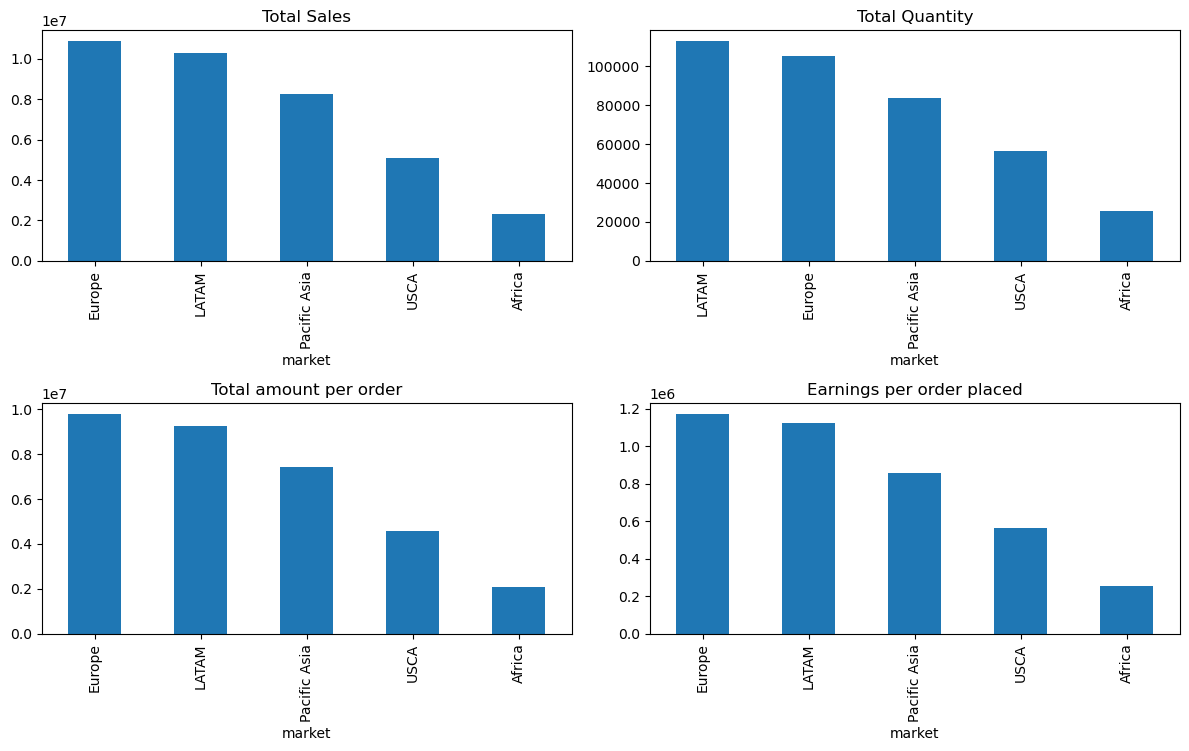

In [24]:
# Total sales by market segment 
plt.figure(figsize=(8,8))
plt.subplot(4, 2, 1)
Market_Data_Group['sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Sales")

# Total quantity by market segment
plt.subplot(4, 2, 2)
Market_Data_Group['order_item_quantity'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Quantity")

# Total amount per order by market segment
plt.subplot(4, 2, 3)
Market_Data_Group['order_item_total'].sum().sort_values(ascending=False).plot.bar(figsize=(18,14), title="Total amount per order")

# Total earnings per order placed by market segment
plt.subplot(4, 2, 4)
Market_Data_Group['benefit_per_order'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Earnings per order placed")

plt.tight_layout()
plt.show()

In [28]:
# Number of orders by market 
Market_Data=SCMDData.groupby(['market'])['order_id'].count().reset_index(name='order_item_quantity').sort_values(by= 'order_item_quantity', ascending= False)
px.pie(Market_Data, values='order_item_quantity', names= 'market' , title= 'Number of Orders per Market', 
       color='market',
             color_discrete_map={'Europe':'red',
                                 'LATAM':'orange',
                                 'Pacific Asia':'purple',
                              'USCA':'pink',
                                'Africa':'brown'})

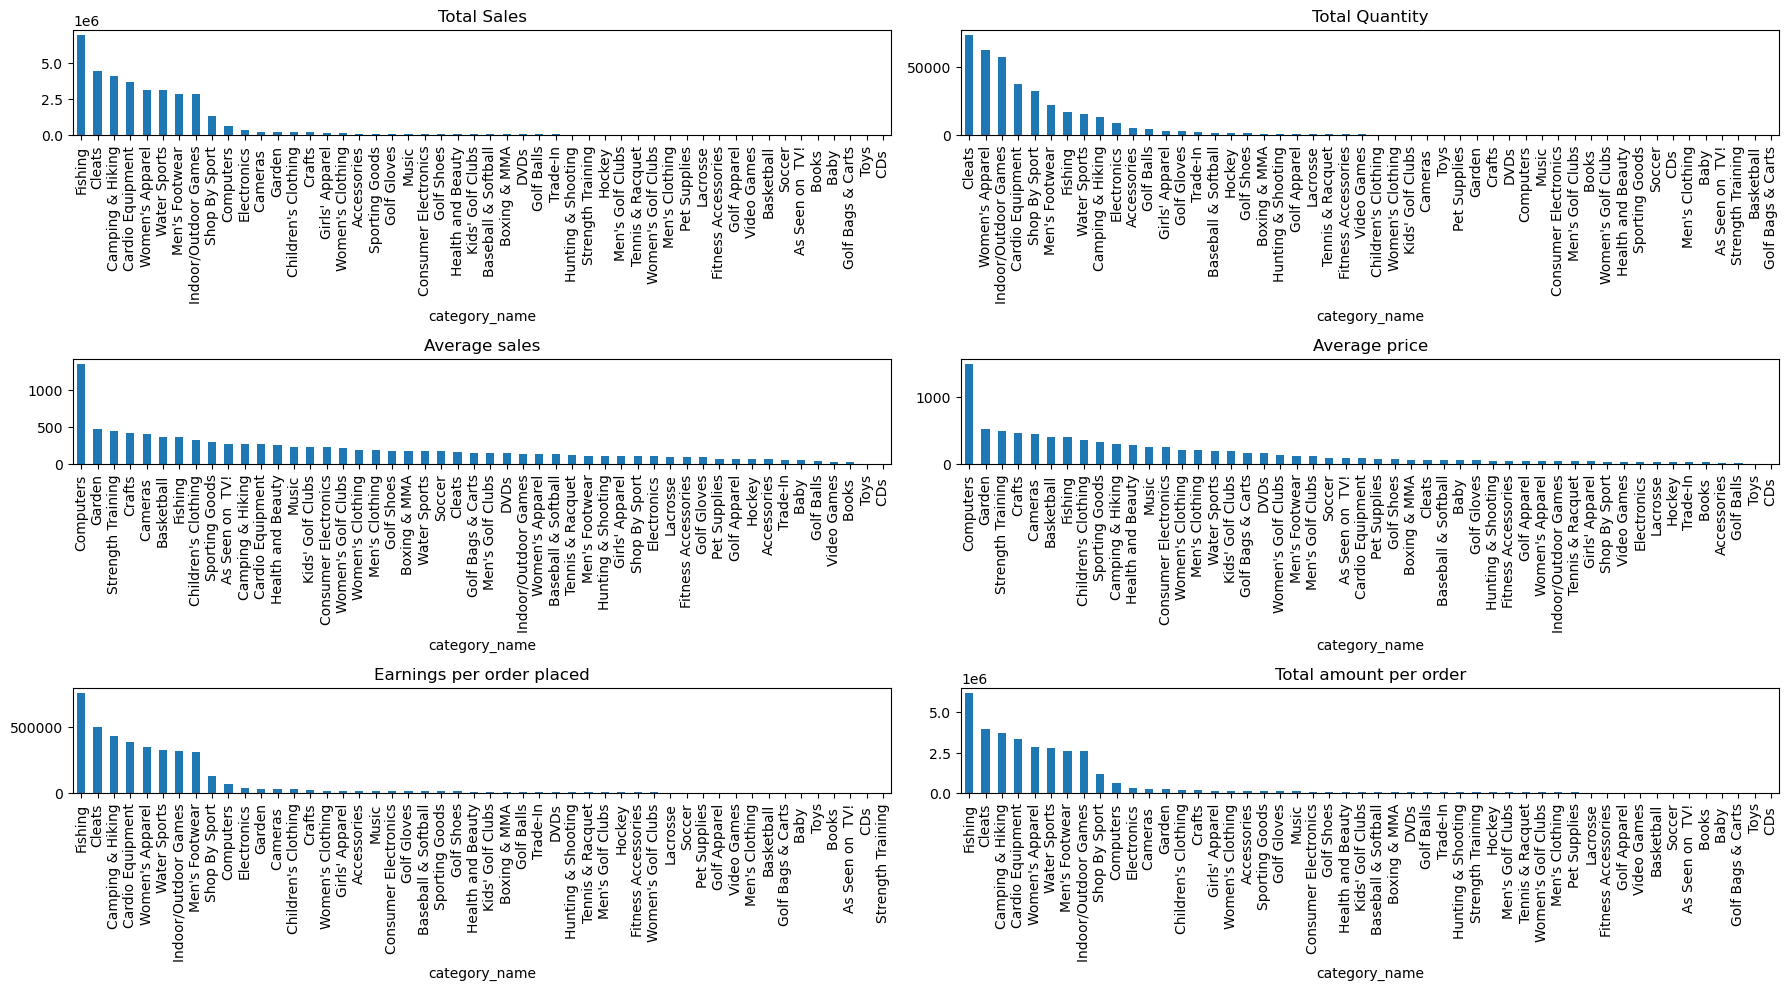

In [36]:
# Total sales by category 
plt.figure(figsize=(10,12))
plt.subplot(6, 2, 1)
Category_Data_Group['sales'].sum().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Total Sales")

# Total order item quantity by category 
plt.subplot(6, 2, 2)
Category_Data_Group['order_item_quantity'].sum().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Total Quantity")

# Average sales per customer by category
plt.subplot(6, 2, 3)
Category_Data_Group['sales_per_customer'].mean().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Average sales")

# Average product pricce by category 
plt.subplot(6, 2, 4)
Category_Data_Group['product_price'].mean().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Average price")

# Benefit per order by category 
plt.subplot(6, 2, 5)
Category_Data_Group['benefit_per_order'].sum().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Earnings per order placed")

# Order_item_total by category 
plt.subplot(6, 2, 6)
Category_Data_Group['order_item_total'].sum().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Total amount per order")


plt.tight_layout()
plt.show()

<Axes: title={'center': 'Regions with most Profit'}>

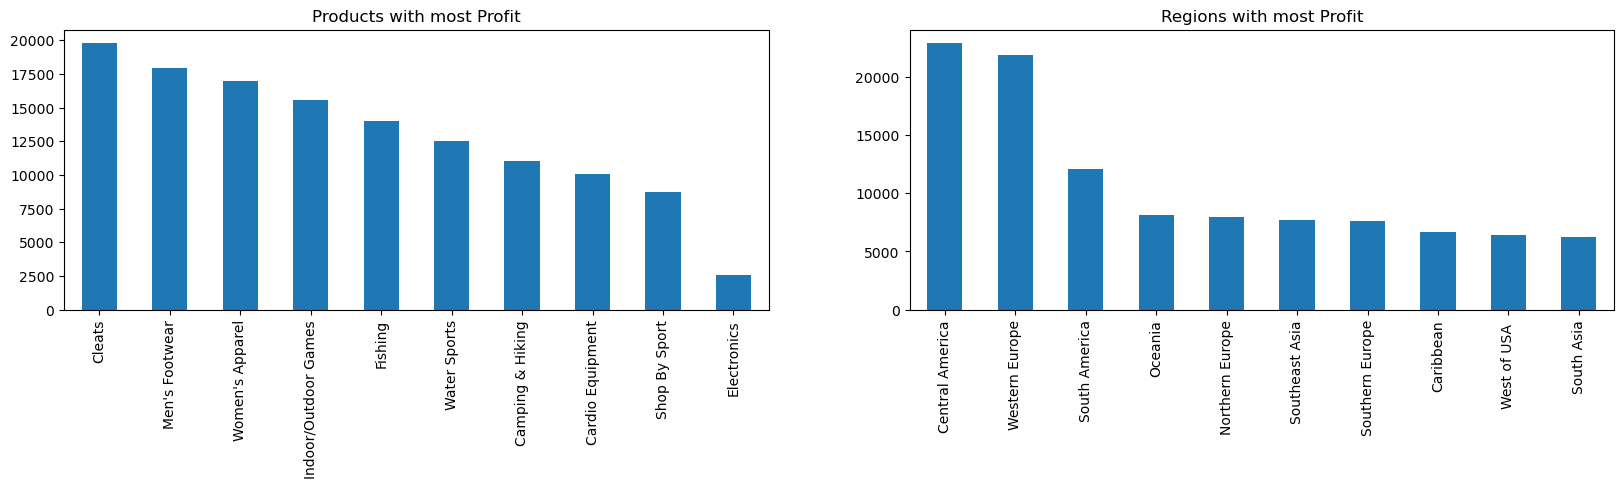

In [38]:
# Ploting top 10 products and regions with most profit 
Revenue_Data = SCMDData[(SCMDData['benefit_per_order']>0)]
plt.figure(figsize=(10,12))
plt.subplot(2, 2, 1)
Revenue_Data['category_name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Products with most Profit")
plt.subplot(2, 2, 2)
Revenue_Data['order_region'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Regions with most Profit")

<Axes: title={'center': 'Top 10 Regions with most Late Deliveries'}>

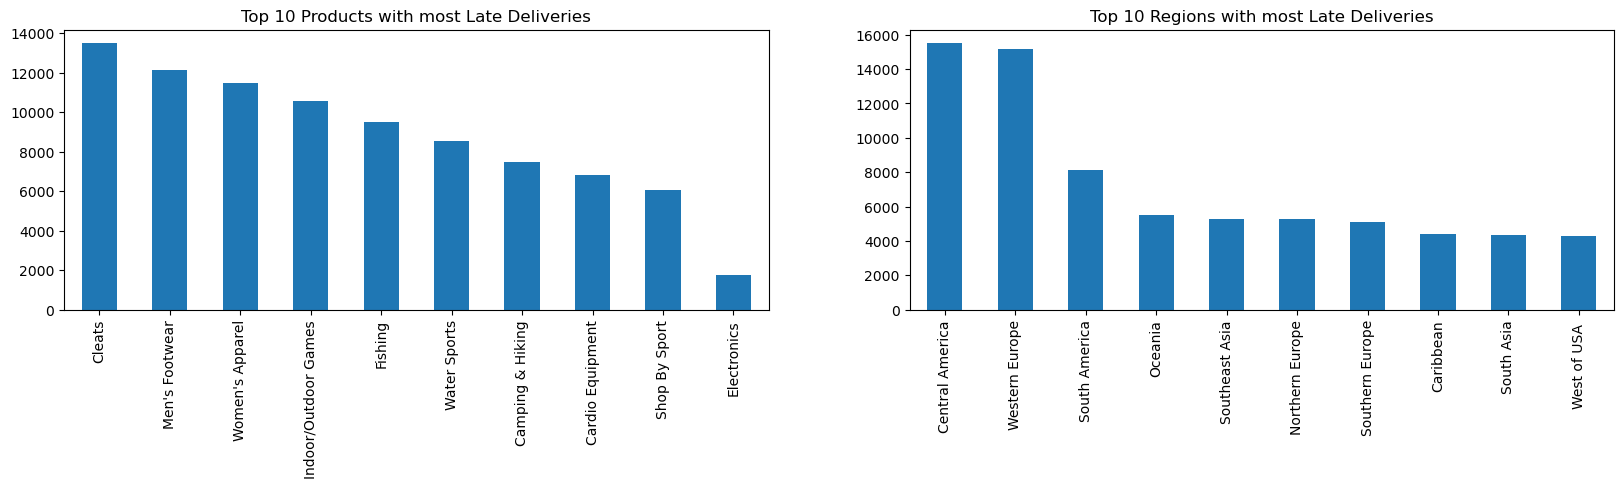

In [40]:
# Ploting top 10 categories and regions with most late deliveries 
late_delivery_data = SCMDData[(SCMDData['delivery_status'] == 'Late delivery')]
plt.figure(figsize=(10,12))
plt.subplot(2, 2, 1)
late_delivery_data['category_name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 Products with most Late Deliveries")
plt.subplot(2, 2, 2)
late_delivery_data['order_region'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 Regions with most Late Deliveries")

In [44]:
# Ploting the shipind modes 
Shipment_Data=SCMDData.groupby(['shipping_mode'])['order_id'].count().reset_index(name='order_item_quantity').sort_values(by= 'order_item_quantity', ascending= False)
px.pie(Shipment_Data, values='order_item_quantity', names= 'shipping_mode' , title= 'Shipment Modes', 
       color='shipping_mode',
             color_discrete_map={'First Class':'brown',
                                 'Same Day':'red',
                                 'Second Class':'orange',
                              'Standard Class':'green'})

In [45]:

Delivery_Data=SCMDData.groupby(['delivery_status'])['order_id'].count().reset_index(name='order_item_quantity').sort_values(by= 'order_item_quantity', ascending= False)
px.pie(Delivery_Data, values='order_item_quantity', names= 'delivery_status' , title= 'Delivery Status', 
       color='delivery_status',
             color_discrete_map={'Advance shipping':'blue',
                                 'Late delivery':'red',
                                 'Shipping canceled':'yellow',
                              'Shipping on time':'green'})

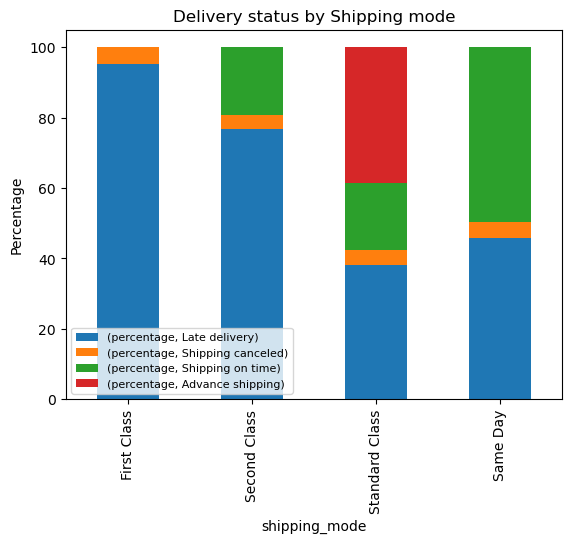

In [51]:
# Ploting the delivery status by shipping mode
SCMDData["late_days"] = SCMDData.days_for_shipping_real - SCMDData.days_for_shipment_scheduled
Shipping_Total = SCMDData.groupby("shipping_mode", as_index = False).agg(count = ("shipping_mode", "count"))
Shipping_Total

Mode = SCMDData.groupby(["shipping_mode", "delivery_status"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))

Mode = Mode.merge(Shipping_Total, on = "shipping_mode", how = "left")
Mode.rename(columns={'count': 'total_number'}, inplace=True)
Mode["percentage"] = Mode.number/Mode.total_number*100

x = ["First Class", "Same Day", "Second Class", "Standard Class"]
for y in x:
    mask = Mode[Mode["shipping_mode"] == y]
    mask = mask.pivot(index='shipping_mode', columns='delivery_status', values=['percentage'])
    exec(f"{y.lower().replace(' ', '_')} = mask")

Mode_graph = pd.concat([first_class, second_class, standard_class, same_day])

Mode_graph.plot(kind='bar', stacked=True)
plt.xlabel('shipping_mode')
plt.ylabel('Percentage')
plt.title('Delivery status by Shipping mode')
plt.legend(loc='lower left', prop={'size': 8})

<Axes: xlabel='days_for_shipment_scheduled', ylabel='days_for_shipping_real'>

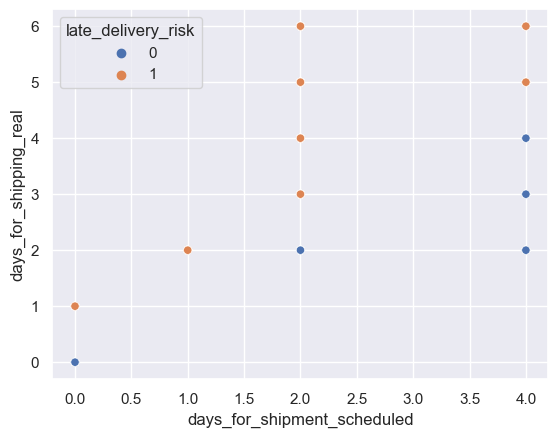

In [52]:
# Identifying late delivery risk 
sns.set()
sns.scatterplot(x="days_for_shipment_scheduled",y="days_for_shipping_real",hue="late_delivery_risk",data=SCMDData)

In [54]:
Payment_Data=SCMDData.groupby(['type'])['order_id'].count().reset_index(name='order_item_quantity').sort_values(by= 'order_item_quantity', ascending= False)
px.pie(Payment_Data, values='order_item_quantity', names= 'type' , title= 'Payment Methods', 
       color='type',
             color_discrete_map={'CASH':'blue',
                                 'DEBIT':'purple',
                                 'PAYMENT':'pink',
                              'TRANSFER':'red'})

In [58]:
SCM_Reg_Data = SCMDData.copy()

In [62]:
# Label encoding for OLS Regression 
label = preprocessing.LabelEncoder()
SCM_Reg_Data['market']= label.fit_transform(SCM_Reg_Data['market'])
SCM_Reg_Data['type']= label.fit_transform(SCM_Reg_Data['type'])
SCM_Reg_Data['product_name']= label.fit_transform(SCM_Reg_Data['product_name'])
SCM_Reg_Data['customer_segment']= label.fit_transform(SCM_Reg_Data['customer_segment'])
SCM_Reg_Data['order_region']= label.fit_transform(SCM_Reg_Data['order_region'])
SCM_Reg_Data['category_name']= label.fit_transform(SCM_Reg_Data['category_name'])
SCM_Reg_Data['shipping_mode']= label.fit_transform(SCM_Reg_Data['shipping_mode'])
SCM_Reg_Data['delivery_status']= label.fit_transform(SCM_Reg_Data['delivery_status'])
SCM_Reg_Data['customer_country']  = label.fit_transform(SCM_Reg_Data['customer_country'])
SCM_Reg_Data['customer_state']= label.fit_transform(SCM_Reg_Data['customer_state'])
SCM_Reg_Data['order_city'] = label.fit_transform(SCM_Reg_Data['order_city'])
SCM_Reg_Data['customer_city']= label.fit_transform(SCM_Reg_Data['customer_city'])
SCM_Reg_Data['department_name']= label.fit_transform(SCM_Reg_Data['department_name'])
SCM_Reg_Data['order_state'] = label.fit_transform(SCM_Reg_Data['order_state'])
SCM_Reg_Data['order_status'] = label.fit_transform(SCM_Reg_Data['order_status'])
SCM_Reg_Data['order_country']= label.fit_transform(SCM_Reg_Data['order_country'])

In [63]:
SCM_Reg_Data.head(10)

type  days_for_shipping_real  days_for_shipment_scheduled  \
0     1                       3                            4   
1     3                       5                            4   
2     0                       4                            4   
3     1                       3                            4   
4     2                       2                            4   
5     3                       6                            4   
6     1                       2                            1   
7     3                       2                            1   
8     0                       3                            2   
9     0                       2                            1   

   benefit_per_order  sales_per_customer  delivery_status  late_delivery_risk  \
0          91.250000          314.640015                0                   0   
1        -249.089996          311.359985                1                   1   
2        -247.779999          309.720001                3                   0   
3          22.860001          304.809998                0                   0   
4         134.210007          298.250000                0                   0   
5          18.580000          294.980011                2                   0   
6          95.180000          288.420013                1                   1   
7          68.430000          285.140015                1                   1   
8         133.720001          278.589996                1                   1   
9         132.149994          275.309998                1                   1   

   category_id  category_name  customer_city  ...  order_state  order_status  \
0           73             40             66  ...          475             2   
1           73             40             66  ...          841             5   
2           73             40            452  ...          841             1   
3           73             40            285  ...          835             2   
4           73             40             66  ...          835             6   
5           73             40            505  ...          835             0   
6           73             40             66  ...          386             2   
7           73             40            318  ...          386             7   
8           73             40             66  ...          386             1   
9           73             40            457  ...          386             1   

   product_card_id  product_category_id  product_name  product_price  \
0             1360                   73            78         327.75   
1             1360                   73            78         327.75   
2             1360                   73            78         327.75   
3             1360                   73            78         327.75   
4             1360                   73            78         327.75   
5             1360                   73            78         327.75   
6             1360                   73            78         327.75   
7             1360                   73            78         327.75   
8             1360                   73            78         327.75   
9             1360                   73            78         327.75   

   shipping_date_dateorders  shipping_mode  customer_full_name  late_days  
0            2/3/2018 22:56              3       CallyHolloway         -1  
1           1/18/2018 12:27              3           IreneLuna          1  
2           1/17/2018 12:06              3    GillianMaldonado          0  
3           1/16/2018 11:45              3            TanaTate         -1  
4           1/15/2018 11:24              3       OrliHendricks         -2  
5           1/19/2018 11:03              3     KimberlyFlowers          2  
6           1/15/2018 10:42              0    ConstanceTerrell          1  
7           1/15/2018 10:21              0        EricaStevens          1  
8           1/16/2018 10:00              2      

In [72]:
# Resulting OLS Regression
SCM_Reg_Data['Intercept'] = 1
Independent_Variables=SCM_Reg_Data[['Intercept',
       'order_item_product_price','order_country','order_item_discount',
      'order_profit_per_order','order_item_quantity','delivery_status','customer_country','customer_state','order_city','customer_city','department_name','order_state','order_status',
'market','type','product_name','customer_segment','order_region','category_name','shipping_mode']]
Model = sm.OLS(SCM_Reg_Data['order_item_total'], Independent_Variables)
Result_Model = Model.fit()
Result_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       order_item_total   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.043e+05
Date:                Mon, 18 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:57:31   Log-Likelihood:            -8.9208e+05
No. Observations:              180519   AIC:                         1.784e+06
Df Residuals:                  180498   BIC:                         1.784e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -35.4732      0.637    -55.714      0.000     -36.721     -34.225
order_item_product_price     0.9688      0.001   1070.831      0.000       0.967       0.971
order_country               -0.0022      0.002     -1.075      0.282      -0.006       0.002
order_item_discount         -0.6025      0.005   -132.234      0.000      -0.611      -0.594
order_profit_per_order       0.0120      0.001     15.571      0.000       0.010       0.013
order_item_quantity         53.7354      0.071    751.562      0.000      53.595      53.876
delivery_status              0.0821      0.082      1.001      0.317      -0.079       0.243
customer_country             0.0980      0.231      0.423      0.672      -0.356       0.552
customer_state               0.0065      0.008      0.846      0.397      -0.009       0.021
order_city                4.667e-05   8.22e-05      0.568      0.570      -0.000       0.000
customer_city                0.0009      0.001      1.541      0.123      -0.000       0.002
department_name             -1.2469      0.034    -36.701      0.000      -1.313      -1.180
order_state              -9.184e-05      0.000     -0.338      0.735      -0.001       0.000
order_status                -0.0678      0.060     -1.135      0.256      -0.185       0.049
market                      -0.4648      0.071     -6.502      0.000      -0.605      -0.325
type                         0.0599      0.136      0.441      0.659      -0.206       0.326
product_name                 0.0320      0.004      7.565      0.000       0.024       0.040
customer_segment            -0.0677      0.105     -0.647      0.517      -0.273       0.137
order_region                -0.0057      0.012     -0.472      0.637      -0.029       0.018
category_name               -0.6523      0.006   -105.529      0.000      -0.664      -0.640
shipping_mode                0.0607      0.073      0.835      0.404      -0.082       0.203
==============================================================================
Omnibus:                    70854.355   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           845376.317
Skew:                           1.554   Prob(JB):                         0.00
Kurtosis:                      13.136   Cond. No.                     1.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
# Resulting OLS regression with selected indepencent variables 
Independent_Variables=SCM_Reg_Data[['Intercept',
       'order_item_product_price','order_item_discount',
       'order_item_quantity','order_profit_per_order','department_name',
'market','product_name','category_name']]
Model = sm.OLS(SCM_Reg_Data['order_item_total'], Independent_Variables)
Result_Model = Model.fit()
Result_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       order_item_total   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.607e+05
Date:                Mon, 18 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:58:28   Log-Likelihood:            -8.9208e+05
No. Observations:              180519   AIC:                         1.784e+06
Df Residuals:                  180510   BIC:                         1.784e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -35.2640      0.419    -84.072      0.000     -36.086     -34.442
order_item_product_price     0.9688      0.001   1071.213      0.000       0.967       0.971
order_item_discount         -0.6024      0.005   -132.227      0.000      -0.611      -0.594
order_item_quantity         53.7350      0.071    751.644      0.000      53.595      53.875
order_profit_per_order       0.0120      0.001     15.569      0.000       0.010       0.013
department_name             -1.2470      0.034    -36.711      0.000      -1.314      -1.180
market                      -0.4478      0.069     -6.456      0.000      -0.584      -0.312
product_name                 0.0319      0.004      7.551      0.000       0.024       0.040
category_name               -0.6523      0.006   -105.537      0.000      -0.664      -0.640
==============================================================================
Omnibus:                    70864.551   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           845643.849
Skew:                           1.555   Prob(JB):                         0.00
Kurtosis:                      13.137   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 0, 'order_profit_per_order')

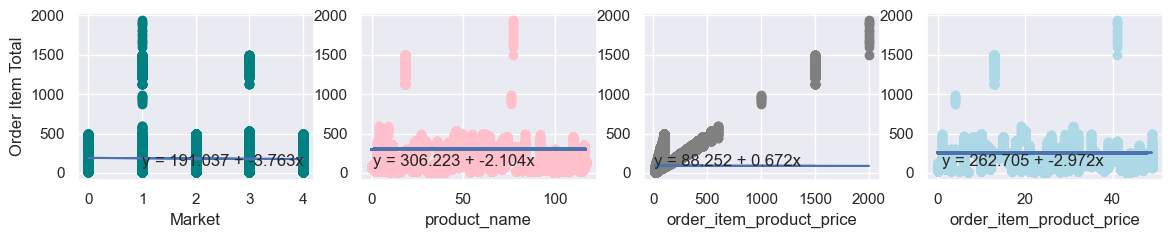

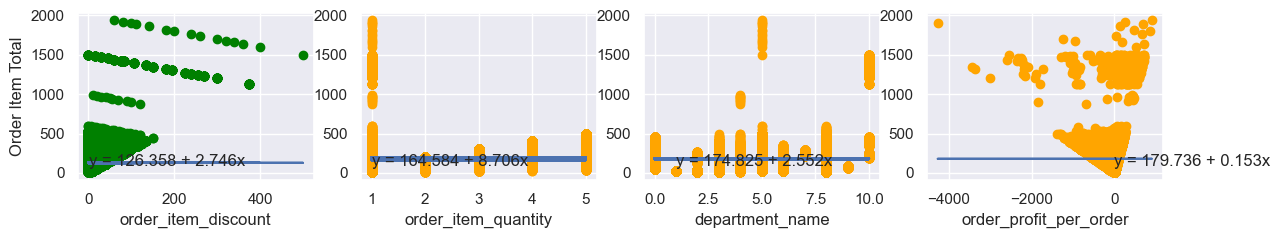

In [88]:
# Visualizing the the regresion line for each predictor variable

plt.figure(figsize=(14,10))
plt.subplot(4, 4, 1)
c, d = np.polyfit(SCM_Reg_Data['market'], SCM_Reg_Data['order_item_total'], 1)
plt.scatter(SCM_Reg_Data['market'], SCM_Reg_Data['order_item_total'], color='teal')
plt.plot(SCM_Reg_Data['market'], c*SCM_Reg_Data['market']+d)
plt.text(1,90, 'y = ' + '{:.3f}'.format(d) + ' + {:.3f}'.format(c) + 'x', size=12)
plt.xlabel('Market')
plt.ylabel('Order Item Total')

plt.subplot(4, 4, 2)
c, d = np.polyfit(SCM_Reg_Data['product_name'], SCM_Reg_Data['order_item_total'], 1)
plt.scatter(SCM_Reg_Data['product_name'], SCM_Reg_Data['order_item_total'], color='pink')
plt.plot(SCM_Reg_Data['product_name'], c*SCM_Reg_Data['market']+d)
plt.text(1,90, 'y = ' + '{:.3f}'.format(d) + ' + {:.3f}'.format(c) + 'x', size=12)
plt.xlabel('product_name')

plt.subplot(4, 4, 3)
c, d = np.polyfit(SCM_Reg_Data['order_item_product_price'], SCM_Reg_Data['order_item_total'], 1)
plt.scatter(SCM_Reg_Data['order_item_product_price'], SCM_Reg_Data['order_item_total'], color='grey')
plt.plot(SCM_Reg_Data['order_item_product_price'], c*SCM_Reg_Data['market']+d)
plt.text(1,90, 'y = ' + '{:.3f}'.format(d) + ' + {:.3f}'.format(c) + 'x', size=12)
plt.xlabel('order_item_product_price')

plt.subplot(4, 4, 4)
c, d = np.polyfit(SCM_Reg_Data['category_name'], SCM_Reg_Data['order_item_total'], 1)
plt.scatter(SCM_Reg_Data['category_name'], SCM_Reg_Data['order_item_total'], color='lightblue')
plt.plot(SCM_Reg_Data['category_name'], c*SCM_Reg_Data['market']+d)
plt.text(1,90, 'y = ' + '{:.3f}'.format(d) + ' + {:.3f}'.format(c) + 'x', size=12)
plt.xlabel('order_item_product_price')

plt.figure(figsize=(14,10))
plt.subplot(4, 4, 1)
c, d = np.polyfit(SCM_Reg_Data['order_item_discount'], SCM_Reg_Data['order_item_total'], 1)
plt.scatter(SCM_Reg_Data['order_item_discount'], SCM_Reg_Data['order_item_total'], color='green')
plt.plot(SCM_Reg_Data['order_item_discount'], c*SCM_Reg_Data['market']+d)
plt.text(1,90, 'y = ' + '{:.3f}'.format(d) + ' + {:.3f}'.format(c) + 'x', size=12)
plt.xlabel('order_item_discount')
plt.ylabel('Order Item Total')

plt.subplot(4, 4, 2)
c, d = np.polyfit(SCM_Reg_Data['order_item_quantity'], SCM_Reg_Data['order_item_total'], 1)
plt.scatter(SCM_Reg_Data['order_item_quantity'], SCM_Reg_Data['order_item_total'], color='orange')
plt.plot(SCM_Reg_Data['order_item_quantity'], c*SCM_Reg_Data['market']+d)
plt.text(1,90, 'y = ' + '{:.3f}'.format(d) + ' + {:.3f}'.format(c) + 'x', size=12)
plt.xlabel('order_item_quantity')

plt.subplot(4, 4, 3)
c, d = np.polyfit(SCM_Reg_Data['department_name'], SCM_Reg_Data['order_item_total'], 1)
plt.scatter(SCM_Reg_Data['department_name'], SCM_Reg_Data['order_item_total'], color='orange')
plt.plot(SCM_Reg_Data['department_name'], c*SCM_Reg_Data['market']+d)
plt.text(1,90, 'y = ' + '{:.3f}'.format(d) + ' + {:.3f}'.format(c) + 'x', size=12)
plt.xlabel('department_name')

plt.subplot(4, 4, 4)
c, d = np.polyfit(SCM_Reg_Data['order_profit_per_order'], SCM_Reg_Data['order_item_total'], 1)
plt.scatter(SCM_Reg_Data['order_profit_per_order'], SCM_Reg_Data['order_item_total'], color='orange')
plt.plot(SCM_Reg_Data['order_profit_per_order'], c*SCM_Reg_Data['market']+d)
plt.text(1,90, 'y = ' + '{:.3f}'.format(d) + ' + {:.3f}'.format(c) + 'x', size=12)
plt.xlabel('order_profit_per_order')

In [89]:
Train_SCM_Data = SCMDData.copy()

In [90]:
label = preprocessing.LabelEncoder()
Train_SCM_Data['customer_country']  = label.fit_transform(Train_SCM_Data['customer_country'])
Train_SCM_Data['market']= label.fit_transform(Train_SCM_Data['market'])
Train_SCM_Data['delivery_status']= label.fit_transform(Train_SCM_Data['delivery_status'])
Train_SCM_Data['type']= label.fit_transform(Train_SCM_Data['type'])
Train_SCM_Data['product_name']= label.fit_transform(Train_SCM_Data['product_name'])
Train_SCM_Data['customer_segment']= label.fit_transform(Train_SCM_Data['customer_segment'])
Train_SCM_Data['customer_state']= label.fit_transform(Train_SCM_Data['customer_state'])
Train_SCM_Data['order_region']= label.fit_transform(Train_SCM_Data['order_region'])
Train_SCM_Data['order_city'] = label.fit_transform(Train_SCM_Data['order_city'])
Train_SCM_Data['category_name']= label.fit_transform(Train_SCM_Data['category_name'])
Train_SCM_Data['customer_city']= label.fit_transform(Train_SCM_Data['customer_city'])
Train_SCM_Data['department_name']= label.fit_transform(Train_SCM_Data['department_name'])
Train_SCM_Data['order_state'] = label.fit_transform(Train_SCM_Data['order_state'])
Train_SCM_Data['order_status'] = label.fit_transform(Train_SCM_Data['order_status'])
Train_SCM_Data['shipping_mode']= label.fit_transform(Train_SCM_Data['shipping_mode'])
Train_SCM_Data['order_country']= label.fit_transform(Train_SCM_Data['order_country'])
Train_SCM_Data['customer_full_name']= label.fit_transform(Train_SCM_Data['customer_full_name'])

In [91]:
train_SCMD=Train_SCM_Data.drop(['shipping_date_dateorders','order_date_dateorders'],axis=1)

In [95]:
x_oiq=train_SCMD .loc[:, train_SCMD .columns !='order_item_quantity']
y_oiq=train_SCMD['order_item_quantity']
x_oiq_train, x_oiq_test,y_oiq_train, y_oiq_test = train_test_split(x_oiq,y_oiq,test_size = 0.3, random_state = 42)

In [98]:
scaling=MinMaxScaler()
x_oiq_train=scaling.fit_transform(x_oiq_train)
x_oiq_test=scaling.transform(x_oiq_test)

In [107]:
def reggmodeling(oiq_model,x_oiq_train, x_oiq_test,y_oiq_train,y_oiq_test):
    oiq_model=oiq_model.fit(x_oiq_train,y_oiq_train)
  
    y_oiq_pred=oiq_model.predict(x_oiq_test)
   
    print('Model parameter used are:',oiq_model) 
   
    print("MAE of Total amount per order is         :", metrics.mean_absolute_error(y_oiq_test,y_oiq_pred))  
    
    print("RMSE of Total amount per order is        :",np.sqrt(metrics.mean_squared_error(y_oiq_test,y_oiq_pred)))

In [109]:
oiq_model=LinearRegression()
reggmodeling(oiq_model,x_oiq_train, x_oiq_test,y_oiq_train,y_oiq_test)

Model parameter used are: LinearRegression()
MAE of Total amount per order is         : 0.33836008380845095
RMSE of Total amount per order is        : 0.5253496492769086


In [114]:
oiq_model=tree.DecisionTreeRegressor()
reggmodeling(oiq_model,x_oiq_train, x_oiq_test,y_oiq_train,y_oiq_test)

Model parameter used are: DecisionTreeRegressor()
MAE of Total amount per order is         : 0.00012925622276386734
RMSE of Total amount per order is        : 0.01136909067445006


In [113]:
oiq_model=RandomForestRegressor(n_estimators=100,max_depth=10, random_state=40)
reggmodeling(oiq_model,x_oiq_train, x_oiq_test,y_oiq_train,y_oiq_test)

Model parameter used are: RandomForestRegressor(max_depth=10, random_state=40)
MAE of Total amount per order is         : 6.961370854568278e-05
RMSE of Total amount per order is        : 0.005675930784035329


In [118]:
Reg_Data = {'Regression Model':  ['Linear Regression','Decision Tree Regression','Random Forest Regression'],
        'MAE' :        [ 0.33823326548125476,0.00012925622276386734,6.961370854568278e-05],
        'RMSE':        [ 0.5253505269286439,0.01136909067445006,0.005675930784035329]}
Reg_comparision = pd.DataFrame (Reg_Data, columns = ['Regression Model','MAE','RMSE'])
Reg_comparision

Regression Model       MAE      RMSE
0         Linear Regression  0.338233  0.525351
1  Decision Tree Regression  0.000129  0.011369
2  Random Forest Regression  0.000070  0.005676

In [119]:
Train_SCM_Data = SCMDData.copy()

In [121]:
# Creating the late delivery column 
Train_SCM_Data['late_delivery']=np.where(Train_SCM_Data['delivery_status'] == 'Late delivery', 1, 0)

In [124]:
lable = preprocessing.LabelEncoder()
Train_SCM_Data['customer_country']  = lable.fit_transform(Train_SCM_Data['customer_country'])
Train_SCM_Data['market']= lable.fit_transform(Train_SCM_Data['market'])
Train_SCM_Data['type']= lable.fit_transform(Train_SCM_Data['type'])
Train_SCM_Data['product_name']= lable.fit_transform(Train_SCM_Data['product_name'])
Train_SCM_Data['customer_segment']= lable.fit_transform(Train_SCM_Data['customer_segment'])
Train_SCM_Data['customer_state']= lable.fit_transform(Train_SCM_Data['customer_state'])
Train_SCM_Data['order_region']= lable.fit_transform(Train_SCM_Data['order_region'])
Train_SCM_Data['order_city'] = lable.fit_transform(Train_SCM_Data['order_city'])
Train_SCM_Data['category_name']= lable.fit_transform(Train_SCM_Data['category_name'])
Train_SCM_Data['customer_city']= lable.fit_transform(Train_SCM_Data['customer_city'])
Train_SCM_Data['department_name']= lable.fit_transform(Train_SCM_Data['department_name'])
Train_SCM_Data['order_state'] = lable.fit_transform(Train_SCM_Data['order_state'])
Train_SCM_Data['order_status'] = lable.fit_transform(Train_SCM_Data['order_status'])
Train_SCM_Data['shipping_mode']= lable.fit_transform(Train_SCM_Data['shipping_mode'])
Train_SCM_Data['order_country']= lable.fit_transform(Train_SCM_Data['order_country'])
Train_SCM_Data['customer_full_name']= lable.fit_transform(Train_SCM_Data['customer_full_name'])

In [125]:
Train_SCM_Data=Train_SCM_Data.drop(['shipping_date_dateorders','order_date_dateorders'],axis=1)

In [126]:
xld=Train_SCM_Data .loc[:, Train_SCM_Data .columns != 'late_delivery']
yld=Train_SCM_Data['late_delivery']
xld_train, xld_test,yld_train,yld_test = train_test_split(xld,yld,test_size = 0.3, random_state = 42)

In [129]:
scaling = StandardScaler()
xld_train=scaling.fit_transform(xld_train)
xld_test=scaling.transform(xld_test)

In [130]:
def classifimodel(ld_model,xld_train, xld_test,yld_train,yld_test):
    ld_model=ld_model.fit(xld_train,yld_train) 
    yld_pred=ld_model.predict(xld_test) 
    accuracy_ld=accuracy_score(yld_pred, yld_test) 
    recall_ld=recall_score(yld_pred, yld_test)
    conf_ld=confusion_matrix(yld_test, yld_pred)
    f1_ld=f1_score(yld_test, yld_pred)
    print('Model paramters used are :',ld_model)
    print('Accuracy of late delivery status is:', (accuracy_ld)*100,'%')
    print('Recall score of late delivery status is:', (recall_ld)*100,'%')
    print('F1 score of late delivery status is:', (f1_ld)*100,'%')
    print('Conf Matrix of late delivery status is: \n',(conf_ld))

In [131]:
ld_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
classifimodel(ld_model,xld_train, xld_test,yld_train,yld_test)

Model paramters used are : RandomForestClassifier(max_depth=10, random_state=0)
Accuracy of late delivery status is: 99.44419824211536 %
Recall score of late delivery status is: 98.99820275577447 %
F1 score of late delivery status is: 99.4965797528056 %
Conf Matrix of late delivery status is: 
 [[24110   301]
 [    0 29745]]


In [135]:
ld_model =  svm.LinearSVC()
classifimodel(ld_model,xld_train, xld_test,yld_train,yld_test)

Model paramters used are : LinearSVC()
Accuracy of late delivery status is: 98.2550409926878 %
Recall score of late delivery status is: 96.93305521152467 %
F1 score of late delivery status is: 98.43612954473993 %
Conf Matrix of late delivery status is: 
 [[23470   941]
 [    4 29741]]


In [136]:
ld_model =  LogisticRegression(solver='lbfgs',random_state=0) 
classifimodel(ld_model,xld_train, xld_test,yld_train,yld_test)

Model paramters used are : LogisticRegression(random_state=0)
Accuracy of late delivery status is: 98.24950144028362 %
Recall score of late delivery status is: 96.93275530493172 %
F1 score of late delivery status is: 98.43108698530386 %
Conf Matrix of late delivery status is: 
 [[23470   941]
 [    7 29738]]


In [139]:
ld_model =  LinearDiscriminantAnalysis() 
classifimodel(ld_model,xld_train, xld_test,yld_train,yld_test)

Model paramters used are : LinearDiscriminantAnalysis()
Accuracy of late delivery status is: 96.20540660314647 %
Recall score of late delivery status is: 96.25793518209154 %
F1 score of late delivery status is: 96.55634687892753 %
Conf Matrix of late delivery status is: 
 [[23291  1120]
 [  935 28810]]


In [142]:
ld_model =   GaussianNB()
classifimodel(ld_model,xld_train, xld_test,yld_train,yld_test)

Model paramters used are : GaussianNB()
Accuracy of late delivery status is: 94.58416426619397 %
Recall score of late delivery status is: 91.21879227647275 %
F1 score of late delivery status is: 95.28979106778654 %
Conf Matrix of late delivery status is: 
 [[21555  2856]
 [   77 29668]]


In [144]:
Classifi_data = {'Classification Model':  ['Random Forest Classification','Support Vector Machines','Logistic Classification Model',
                                 'Linear Discriminant Analysis','Gaussian Naive Bayes Model'],
       'Accuracy' :        [ 99.44419824211536, 98.25688751015585,98.24950144028362,96.20540660314647, 94.58416426619397],
        'Recall':        [98.99820275577447, 96.93315516735652,96.93275530493172,96.25793518209154,91.21879227647275],
        'F1' :     [99.4965797528056,98.4378102866221,98.43108698530386,96.55634687892753,95.28979106778654],   
        'TN' :        [24110,23470,23470,23291,21555],
        'FP':        [301,941, 941,1120,2856],
        'FN' :     [0,3,7,935,77],
        'TP':     [29745,29742,29738,28810,29668] }
Classifi_comparision = pd.DataFrame (Classifi_data, columns = ['Classification Model','Accuracy','Recall','F1','TN','FP',
        'FN','TP'])
Classifi_comparision 

Classification Model   Accuracy     Recall         F1     TN  \
0   Random Forest Classification  99.444198  98.998203  99.496580  24110   
1        Support Vector Machines  98.256888  96.933155  98.437810  23470   
2  Logistic Classification Model  98.249501  96.932755  98.431087  23470   
3   Linear Discriminant Analysis  96.205407  96.257935  96.556347  23291   
4     Gaussian Naive Bayes Model  94.584164  91.218792  95.289791  21555   

     FP   FN     TP  
0   301    0  29745  
1   941    3  29742  
2   941    7  29738  
3  1120  935  28810  
4  2856   77  29668